# Projet numérique de Science des Données 2025

__Binôme numéro 29 -- BECK Corto et LELAIDIER Romain__

## Introduction

Dans ce projet, il s'agira d'étudier un jeu de données concernant des femmes diabétiques enceintes. Le diabète constitue un facteur de risque pour le bon déroulé de la grossesse. Pour chacune de ces femmes, nous disposons de 7 variables :
* `Age` : l'âge en années
* `Tension systolique` : la tension systolique en mmHg
* `Tension diastolique` : la tension diastolique en mmHg
* `Glycémie` : glycémie post-prandiale en mmol/L
* `Température` : température en °C
* `FC au repos` : fréquence cardiaque au repos
* `Risque` : degré de risque obstétrique (0 : faible, 1 : moyen, 2 : élevé)


Ce projet comporte trois partie :
1. Une analyse exploratoire des données
2. La construction d'un classifieur binaire permettant de séparer les femmes dont la grossesse est à risque de celles dont elle ne l'est pas
3. La construction d'un classifieur multi-classe permettant de séparer les grossesses en trois classes : hautement à risque, moyennement à risque, faiblement à risque.

## Instructions 
* Former un binôme et l'inscrire dans Moodle.
* Renseigner le numéro de binôme et vos noms tout en haut de ce notebook à l'emplacement indiqué.
* Déposer ce notebook complété **au plus tard le 10 juillet 2025, 23h59** sur Moodle.

La présence aux séances dédiés au mini-projet (20/06 et 7/07) est **notée**. 

Les questions **1 à 14** peuvent être traitées dès la première séance. 
La question **15** peut être traitée après la PC4.
Les questions **16 à 30** peuvent être traitées à partir de la PC5.

Pour des raisons pédagogiques (voir la note à ce sujet), **l'usage d'assistants de code ou d'agents conversationnels tels que ChatGPT, Copilot, Claude, LeChat est prohibé. Leur utilisation sera sanctionnée.**

### Question 1 (1pt)

Les données ont été récoltées dans une région défavorisée du monde, où les populations sont très pauvres et peuvent difficilement consulter. Quel peut être l'intérêt de déléguer à un algorithme la prédiction du risque obstétrique ? Quelles peuvent être les dérives (sociales, éthiques, économiques, psychologiques) d'une telle pratique ?

**Réponse.** 

Un algorithme de prédiction du risque obstétrique, dans un contexte où les populations ont peu accès aux soins, pourrait vraiment jouer un rôle important. Il permettrait de détecter plus facilement les grossesses à risque, et donc d’orienter les efforts médicaux là où ils sont les plus nécessaires, surtout dans des régions où les ressources (et les médecins) sont rares. Si on met à disposition des outils simples permettant de mesurer les variables nécessaires (tension, glycémie...), les femmes pourraient faire un premier "auto-diagnostic" pour savoir s’il est urgent de consulter. Ça pourrait alléger le système de santé local et rendre l’accès aux soins un peu plus efficace, surtout si les consultations sont rares ou coûteuses.

Il faut toutefois faire attention aux dérives liées à son utilisation : chaque cas médical reste unique, et doit donc être traité et surveillé avec attention par un médecin qualifié.

En effet, l’utilisation uniquement d’un algorithme pour prédire le risque obstétrique présenterait des risques éthiques, notamment si l’algorithme est mal entraîné ou biaisé, ce qui peut entraîner de graves erreurs. Il ne doit pas remplacer un vrai diagnostic médical, mais rester un outil d’aide. Socialement, cela peut créer ou renforcer des inégalités, par exemple si certaines femmes sont poussées à avorter ou d’autres à être ignorées. Économiquement, remplacer des professionnels par des machines peut freiner les investissements en santé. Psychologiquement, le manque de contact humain peut être difficile à accepter. Enfin, la confidentialité des données est un enjeu important, surtout dans des régions sans protection légale.

Il ne s'agit pas de s'en remettre totalement à l'algorithme de classification, mais de l'utiliser comme outil pour appuyer des décisions.

## Librairies usuelles

In [1]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

np.random.seed(19) 

## Chargement des données

Nous allons pour l'instant travailler avec le jeu de données d'entraînement `data/donnees_entrainement.csv` :

In [2]:
df_train = pd.read_csv('data/donnees_entrainement.csv')

In [3]:
df_train.head()

,Age,Tension systolique,Tension diastolique,Glycémie,Température,FC au repos,Risque
0,21.0,85.0,55.0,7.0,36.2,84.0,1
1,36.0,145.0,100.0,6.9,39.5,73.0,2
2,15.5,120.0,75.0,7.4,39.0,74.0,0
3,49.0,135.0,100.0,15.9,37.8,72.0,1
4,56.5,120.0,90.0,12.0,36.9,74.0,1


Commençons par en extraire deux arrays, `X_train` et `y_train`, contenant d'une part les variables décrivant les observations et d'autre part leurs étiquettes :

In [4]:
X_train = np.array(df_train.drop('Risque', axis=1))
y_train = np.array(df_train['Risque'], dtype='int')

In [5]:
X_train.shape, y_train.shape

((800, 6), (800,))

# 1. Exploration de données

## Distributions des variables

### Question 2 (1 pt)
Pour chaque variable, affichez un histogramme de sa distribution dans chacune des trois classes.

In [6]:
# couleurs pour l'indicateur de risque

risk_colors = [
    'green',
    'yellow',
    'orange'
]


risk_labels = [
    'Faible', 
    'Moyen', 
    'Elevé'
]

risk_cmap = matplotlib.colors.ListedColormap(risk_colors)

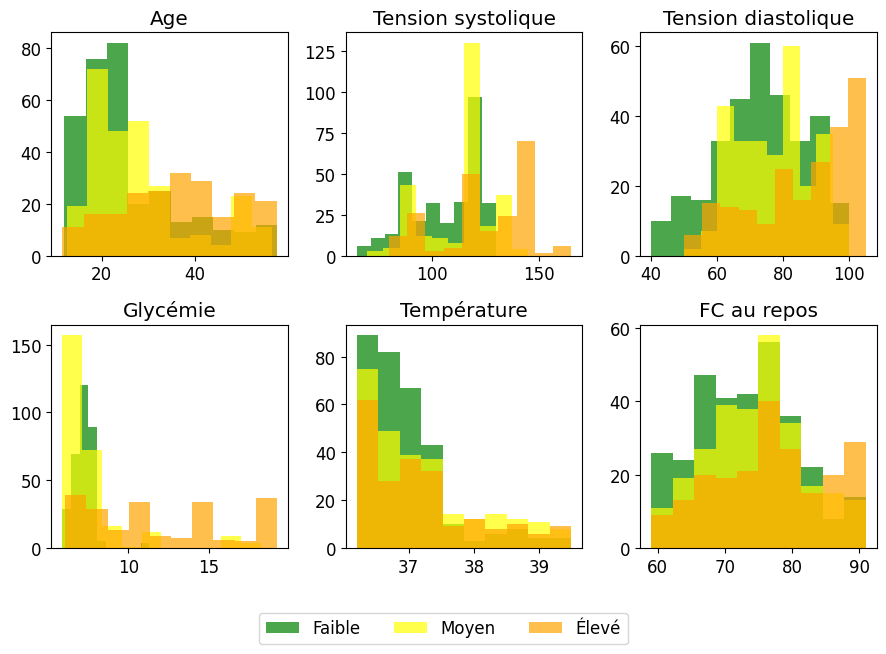

In [7]:
fig = plt.figure(figsize=(9, 6))

for (feat_idx, feat_name) in enumerate(df_train.columns[:6]):
    ax = fig.add_subplot(2, 3, (feat_idx+1))

    for risk_value in range(3):
        label = ['Faible', 'Moyen', 'Élevé'][risk_value] if feat_idx == 0 else None

        h = ax.hist(df_train[df_train['Risque'] == risk_value][feat_name],bins=10,edgecolor='none',alpha=0.7,color=risk_colors[risk_value],label=label)

    ax.set_title(feat_name)

fig.tight_layout(pad=1.0)

fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))

### Question 3 (1 pt)
Les valeurs prises par ces variables sont-elles surprenantes ? Cohérentes avec le degré de risque ?

**Réponse 2 :**

Les valeurs prises par les variables semblent cohérentes avec les indicateurs de "bonne santé" communément utilisés.

L’âge joue un rôle important. Les femmes très jeunes (moins de 25 ans) sont majoritairement dans la catégorie à faible risque, tandis que les risques moyens puis élevés apparaissent de plus en plus à partir de 30-35 ans. Cela correspond à l’idée que les complications augmentent avec l’âge.

Les tensions systolique et diastolique semblent également corrélées à un risque plus élevé : plus la catégorie de risque est élevée, plus les tensions mesurées sont importantes.

La température corporelle, en revanche, semble moins liée au risque de complications. Les différentes catégories de risque présentent des distributions de températures assez similaires.

Pour la fréquence cardiaque, on observe aussi une tendance à des valeurs plus élevées chez les patientes à risque, mais la différence est moins marquée que pour les tensions.

Chez les femmes qui présentent un risque élevé, on retrouve une glycémie souvent beaucoup plus importante que la moyenne, tandis que la majorité des femmes des catégories "moyen" et "faible" présentent une glycémie plus faible comprise entre 5 mmol/L et 10 mmol/L.

Cela dit, pour chaque variable qui semble corrélée au risque, on peut toujours trouver des cas particuliers qui vont à l'encontre de cette corrélation. C’est la combinaison de plusieurs indicateurs qui permet d’évaluer le risque, et non une seule variable prise isolément.

### Question 4 (1 pt)
Pensez-vous qu'il va être facile/difficile de prédire le risque de grossesse à risque en utilisant ces 6 variables ?

**Réponse.**

Prédire le risque de grossesse à risque à partir de ces six variables semble plutôt difficile, aucune variable ne montrant à elle seule une différence vraiment nette entre les risques faible, moyen et fort. Cependant, en combinant ces variables avec des coefficients adaptés, il est possible d’obtenir une prédiction correcte.

Certaines variables paraissent plus importantes visuellement pour estimer le risque, notamment le taux de glycémie, l’âge et les tensions artérielles. Même si on ne peut pas espérer une classification parfaite, les données d’entraînement restent prometteuses.

## Réduction de dimension

Indépendamment de votre réponse à la question précédente, nous allons procéder à deux tentatives de réduction de dimension.

### Question 5 (1 pt)
Utilisez la décomposition en composantes principales de `X_train` pour visualiser les données en deux dimensions.

In [8]:
from sklearn import preprocessing, decomposition

In [9]:
# centrage et réduction des composantes de X_train
std_scale = preprocessing.StandardScaler().fit(X_train)
X_scaled = std_scale.transform(X_train)
# initialisation de l'APC pour 2 dimensions
pca = decomposition.PCA(n_components=2)
# calcul de l'APC
pca.fit(X_scaled)
# reprojection des données
X_projected = pca.transform(X_scaled)

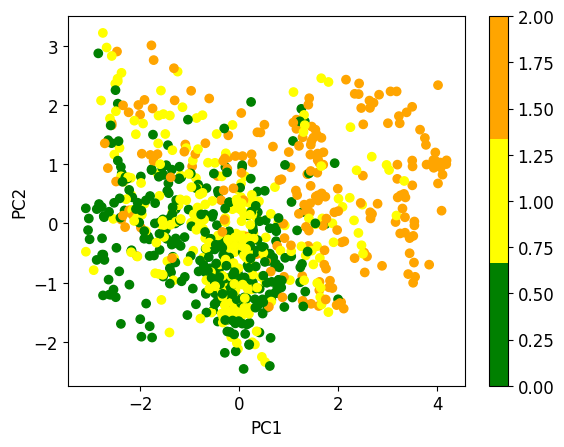

In [11]:
# affichage
plt.scatter(X_projected[:,0], X_projected[:,1], c=df_train['Risque'], cmap=risk_cmap)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

### Question 6 (1 pt) 
Pensez-vous utile d'utiliser cette ACP pour réduire la dimension des données pour construire un prédicteur de risque de grossesse difficile ?

**Réponse :**

Cette ACP nous permet de distinguer des tendances pouvant être utiles afin de prédire le risque de grossesse difficile.

Globalement, le risque est plus élevé pour des composantes principales PC1 et PC2 plus élevées.

Cependant, la composante PC2 semble moins pertinente que la PC1 pour distinguer les niveaux de risques puisqu'on observe par exemple plusieurs occurences de risques faibles et moyens pour une composante PC2 élevée. Mais cela était attendu puisque la deuxième directions principale présente une variance plus faible que la première.

De plus, les risques faibles et moyens présentent des distributions assez similaires et il semble difficile de les distinguer grâce à cette ACP uniquement.

Afin d'y voire plus clair, nous pouvons nous intéresser à la proportion de variance expliquée par ces deux composantes :

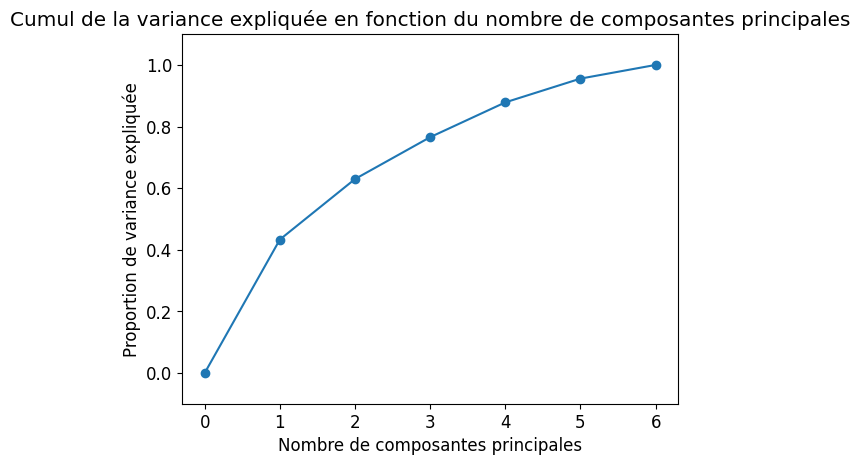

In [16]:
pca2 = decomposition.PCA(n_components=6)
pca2.fit(X_scaled)

x_vals = np.arange(0, 7)
y_vals = np.insert(pca2.explained_variance_ratio_.cumsum(), 0, 0)

plt.plot(x_vals, y_vals, marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")
plt.title("Cumul de la variance expliquée en fonction du nombre de composantes principales")
plt.ylim(-0.1, 1.1)
plt.show()

In [18]:
decomposition.PCA().fit(X_scaled).explained_variance_ratio_

array([0.43311432, 0.19646383, 0.1359057 , 0.1129674 , 0.07713432,
       0.04441443])

Les deux premières composantes principales ne permettent donc d'expliquer qu'environ 63% de la variance totale et il faut considérer au moins 5 composantes afin d'atteindre les 95%. Il est donc préférable de ne pas se limiter qu'aux deux premières composantes principales.

### Question 7 (0,5 pt)
Affichez la matrice de corrélation entre les variables (étiquette exclue)

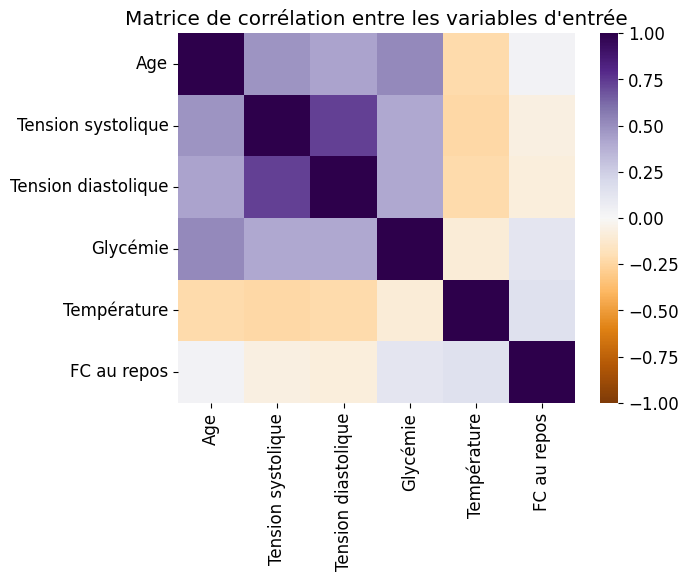

[[ 1.00125156  0.48326422  0.42952259  0.52378213 -0.2192495   0.0347252 ]
 [ 0.48326422  1.00125156  0.72961185  0.4126828  -0.23963067 -0.06487187]
 [ 0.42952259  0.72961185  1.00125156  0.41048993 -0.22509561 -0.08544316]
 [ 0.52378213  0.4126828   0.41048993  1.00125156 -0.0958218   0.1219226 ]
 [-0.2192495  -0.23963067 -0.22509561 -0.0958218   1.00125156  0.15533372]
 [ 0.0347252  -0.06487187 -0.08544316  0.1219226   0.15533372  1.00125156]]


In [23]:
import seaborn as sns

corr_matrix = df_train.drop(columns=['Risque']).corr()

sns.heatmap(corr_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap='PuOr',
           )

plt.title("Matrice de corrélation entre les variables d'entrée")
plt.show()

print(np.cov(X_scaled.T))

### Question 8 (0,5 pt)

Comment utiliser cette matrice de corrélation pour réduire la dimension des données ?

**Réponse :**

La matrice de corrélation permet d'identifier quelles variables sont corrélées entre elles et donc porteuses de la même information. 

Ici, la tension diastolique et la tension systolique sont assez fortement linéairement et positivement corrélées puisque leur coefficient de Pearson vaut environ 0,73 (il s'agit du plus élévé). On  peut donc écarter une des deux variables afin de réduire la dimension des données sans perdre trop d'information.

# 2. Classification «à risque» vs «sans risque»

Nous allons maintenant transformer les étiquettes en étiquettes binaire, en regroupant les risques obstétriques moyens et élevés. Les étiquettes `1` et `2` seront regroupées en une seule étiquette `1`.

In [24]:
# Copier le dataframe initial dans un nouveau dataframe 
df_train_risk_vs_norisk = df_train.copy()

# Regrouper les étiquettes 1 et 2
df_train_risk_vs_norisk['Risque'] = np.where(df_train['Risque']==2, 1, df_train['Risque'])

# Extraction de l'array d'étiquettes
y_train_risk_vs_norisk = np.array(df_train_risk_vs_norisk['Risque'], dtype='int')

## Choix du critère d'évaluation
Pour cette section, on pourra se référer à la section 8.7.1 du poly.

### Question 9 (0,25 pt)
Quelle serait l'_accuracy_ (proportion d'observations correctement étiquetées) d'un modèle qui prédit que toutes les observations appartiennent à la classe majoritaire (c'est-à-dire la classe ayant le plus grand nombre d'observations dans les données) ? 

L'accuracy vaut en général :

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

Pour le modèle considéré, on a :

$
\text{Accuracy} = \frac{N_{\text{majoritaire}}}{N}
$

où $n$ est le nombre total d'observations et $n_{\text{majoritaire}}$ est le nombre d'observations de la classe majoritaire.

In [27]:
TP = max(np.sum(y_train_risk_vs_norisk == 0), np.sum(y_train_risk_vs_norisk == 1))
accuracy = TP / len(y_train_risk_vs_norisk)
print(f"Laccuracy vaut {accuracy}")

Laccuracy vaut 0.605


### Question 10 (0,25 pt) 
La __précision équilibrée__ (_balanced accuracy_) d'un classifieur binaire est donnée par :

$$BA = \frac12 \left( \frac{\text{TP}}{\text{TP}+\text{FN}} +  \frac{\text{TN}}{\text{TN}+\text{FP}} \right)$$

Expliquez pourquoi ce critère d'évaluation est plus pertinent que l'accuracy pour sélectionner un classifieur optimal.

**Réponse :**

La précision équilibrée est une moyenne entre le rappel et la spécificité, 'est-à-dire entre le taux de vrais négatifs et le taux de vrais positifs. 

Ce critère est donc préférableà l'accuracy car on veut que le modèle reconnaisse bien à la fois les cas à risque et ceux qui ne le sont pas, pas seulement une seule catégorie.

Par exemple, un modèle qui prédit toujours la même classe (comme dans la question précédente) aura une précision équilibrée de 0,5, quel que soit le déséquilibre dans les données. Même si 90 % des patients sont à risque, et que l’accuracy serait alors très élevée (90 %), ce modèle reste mauvais pour détecter les 10 % restants. En revanche, le balanced accuracy resterait à 0,5, ce qui reflète mieux cette limite.

Ainsi, dès que la précision équilibrée est supérieure à 0,5, cela signifie que le modèle sait un minimum bien distinguer les deux classes.

Dans la suite du projet, nous utiliserons ce critère, implémenté dans la méthode [metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) de scikit-learn.

## Plus proche voisin
L'algorithme du plus proche voisin associe à une observation $\vec{x}$ l’étiquette du point du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 11 (0,5 pt)
En quoi consiste la phase d'entraînement d'un tel classifieur ?

La phase d'entraînement consiste simplement à mémoriser (stocker) les données d'entraînement et leurs étiquettes. Aucun calcul n'est effectué à ce stade. La classification d'une nouvelle observation se fait ensuite en trouvant le point d'entraînement le plus proche.

### Question 12 (0,5 pt)
Quelle précision équilibrée attendez-vous _sur le jeu d'entraînement_ d'un algorithme du plus proche voisin ? Pourquoi ?

**Réponse :**

Comme l'algorithme du plus proche voisin associe à une observation $\vec{x}$ l’étiquette du point du jeu d’entraînement dont elle est la plus proche et que le voisin le plus proche d'un point du jeu d'entrainement est lui-même, on s'attend à obtenir une précision éuilibrée de 1.

 Il peut y avoir une exception si il y a des doublons étiquetés différemment, mais cela est peu probable dans notre situation et la précision resterait proche de 1.

### Question 13 (0,5 pt)
Vérifiez votre réponse sur les données, en utilisant la classe [neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score


X_train_risk_vs_norisk = np.array(df_train_risk_vs_norisk.drop(columns=['Risque']))
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_risk_vs_norisk, y_train_risk_vs_norisk)


y_pred_ppv = neigh.predict(X_train_risk_vs_norisk)

ba_train = balanced_accuracy_score(y_train, y_pred_train)

print(f"La précision équilibrée vaut {ba_train:.3f}")


La précision équilibrée vaut 1.000


### Quesion 14 (0,5 pt)
Pour cet algorithme, vaut-il mieux utiliser les données d'origine ou les données centrées-réduites ? Justifiez votre réponse.

**Réponse :**

Lalgorithme du plus proche voisins étant basé sur les distances euclidiennes entre les points, les variables avec un plus grand ordre de grandeur et une plus grande variance vont avoir une plus grande influence sur les résultats. En centrant et réduisant les données , on donne un poids équitable à chaque variable, ce qui améliore la performance du modèle.

## K plus proches voisins
L'algorithme des $K$ plus proche voisins associe à une observation $\vec{x}$ l’étiquette qui est majoritaires parmi celle des $K$ points du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 15 (1,5 pt)
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ (voir amphi 7 et PC5) pour déterminer une valeur optimale de $K$. 

* Justifiez votre choix de grille de valeurs.
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

Le nombre optimal de plus proches voisins est 1.


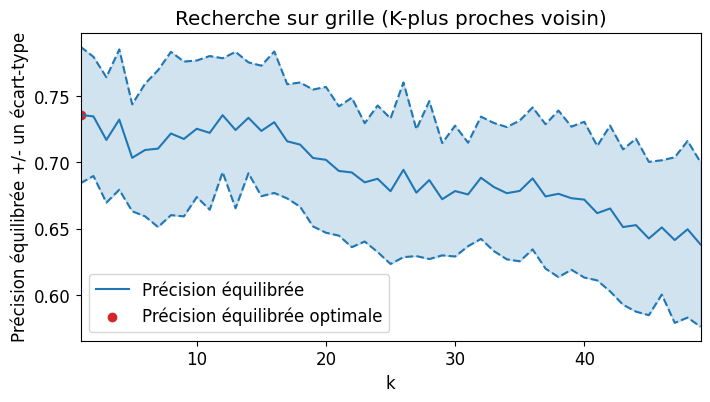

In [38]:
from sklearn import model_selection 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Création des folds
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Définir la grille de valeurs de l'hyperparamètre k 
ks = range(1,50)

# Définir le modèle à évaluer
neigh = KNeighborsClassifier()

# Instantier la recherche sur grille
grid = model_selection.GridSearchCV(neigh, {'n_neighbors': ks}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid.fit(X_train_risk_vs_norisk, y_train_risk_vs_norisk)

plt.figure(figsize=(8, 4))

scores_mean = grid.cv_results_['mean_test_score']
scores_std = grid.cv_results_['std_test_score']

# afficher la moyenne et l'écart-type
plt.plot(grid.cv_results_['param_n_neighbors'], scores_mean, 
         label="Précision équilibrée", color='tab:blue')
plt.plot(grid.cv_results_['param_n_neighbors'], scores_mean + scores_std, 
         color='tab:blue', linestyle='dashed')
plt.plot(grid.cv_results_['param_n_neighbors'], scores_mean - scores_std, 
         color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(ks, scores_mean + scores_std, scores_mean - scores_std, 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# afficher le meilleur score
plt.scatter(grid.best_params_['n_neighbors'], grid.best_score_, 
           color='tab:red', label='Précision équilibrée optimale')
print(f"Le nombre optimal de plus proches voisins est {grid.best_params_['n_neighbors']}.")

# Mise en forme
plt.xlabel("k")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([ks[0], ks[-1]])
plt.title("Recherche sur grille (K-plus proches voisin)")
plt.legend(loc='best')
plt.show()


Choix de la grille : On teste les valeurs de $K$ de 1 à 50 car un $K$ trop petit est sensible au bruit, tandis qu’un $K$ trop grand lisse trop la frontière.

Graphique : La courbe montre la précision équilibrée moyenne obtenue pour chaque valeur de $K$ avec son écart-type. On observe une descente initiale pour K variant de 1 à 5 puis une légèremontée, puis un plateau ou une légère baisse, ce qui illustre bien le compromis biais/variance.

Meilleur $K$ : Le $K$ optimal est celui qui maximise la précision équilibrée sur la validation croisée. Ce paramètre équilibre bien la capacité du modèle à détecter les deux classes (risque / pas risque)

k=1 correspond au plus proche voisin unique :
Le classifieur va toujours prédire la classe du point d'entraînement le plus proche. Cela peut engendrer du surapprentissage (overfitting) car la décision est très locale.

En partant de k=2 ou plus peut mieux lisser les frontières de décision et donner une meilleure généralisation.

Le nombre optimal de plus proches voisins est 12.


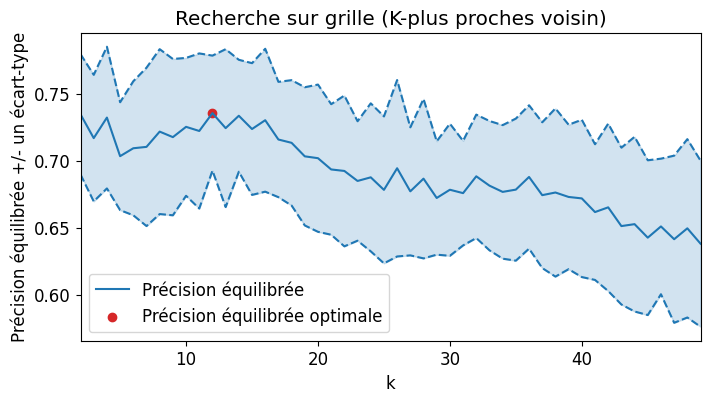

In [37]:
from sklearn import model_selection 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Création des folds
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Définir la grille de valeurs de l'hyperparamètre k 
ks = range(2,50)

# Définir le modèle à évaluer
neigh = KNeighborsClassifier()

# Instantier la recherche sur grille
grid = model_selection.GridSearchCV(neigh, {'n_neighbors': ks}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid.fit(X_train_risk_vs_norisk, y_train_risk_vs_norisk)

plt.figure(figsize=(8, 4))

scores_mean = grid.cv_results_['mean_test_score']
scores_std = grid.cv_results_['std_test_score']

# afficher la moyenne et l'écart-type
plt.plot(grid.cv_results_['param_n_neighbors'], scores_mean, 
         label="Précision équilibrée", color='tab:blue')
plt.plot(grid.cv_results_['param_n_neighbors'], scores_mean + scores_std, 
         color='tab:blue', linestyle='dashed')
plt.plot(grid.cv_results_['param_n_neighbors'], scores_mean - scores_std, 
         color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(ks, scores_mean + scores_std, scores_mean - scores_std, 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# afficher le meilleur score
plt.scatter(grid.best_params_['n_neighbors'], grid.best_score_, 
           color='tab:red', label='Précision équilibrée optimale')
print(f"Le nombre optimal de plus proches voisins est {grid.best_params_['n_neighbors']}.")

# Mise en forme
plt.xlabel("k")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([ks[0], ks[-1]])
plt.title("Recherche sur grille (K-plus proches voisin)")
plt.legend(loc='best')
plt.show()


## Régression logistique
Le pendant pour la classification binaire de la régression linéaire (amphi 7 et PC 5) est la __régression logistique__ (PC 6). Dans scikit-learn, elle est implémentée par la classe [linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Question 16 (1 pt) 
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ pour déterminer une valeur optimale du coefficient de régularisation d'une régression logistique. 

* Justifiez votre choix de type de régularisation et de grille de valeurs. 
* Illustrez par un graphique approprié votre exploration de cette grille. 
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

## Algorithme non-linéaire

### Question 17 (2pt)
Choisissez maintenant un algorithme permettant d'apprendre un modèle non-linéaire parmi ceux du chapitre 9 :
* arbre de décision : [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* forêt aléatoire : [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* machine à vecteur de support à noyau : [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* perceptron multi-couche : [neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Utilisez encore une fois une recherche sur grille avec une validation croisée en 10 _folds_ pour sélectionner le(s) hyperparamètre(s) le(s) plus pertinent(s).

* Justifiez votre choix d'hyperparamètre(s) à optimiser.
* Justifiez votre choix de grille de valeurs pour ces ou cet hyperparèmtre(s).
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la ou les valeur(s) optimale(s) d'hyperparamètre(s) et la précision équilibrée correspondante.

## Classification après réduction de dimension

Nous allons maintenant évaluer l'impact d'une réduction de dimension sur la qualité de l'apprentissage.

### Question 18 (0,25 pt)
Quel algorithme (k plus proches voisins ; régression logistique ; algorithme non-linéaire de la question 16) vous a permis d'obtenir la meilleure performance ? 

### Quesion 19 (0,25 pt)
Utilisez le travail des questions 4 à 7 pour créer une nouvelle matrice représentant les données dans moins de dimensions qu'originellement. 

### Question 20 (0,25 pt)
Utilisez encore une fois une recherche sur grille pour optimiser les performances de cet algorithme, mais entrainé sur cette nouvelle matrice. 

### Question 21 (0,25 pt)
La réduction de dimension a-t-elle été utile ? Commentez.

## Classifieur final

### Question 22 (0,25 pt)
Au vu des performances observées jusqu'à présent, quel est l'algorithme d'apprentissage, son ou ses valeurs d'hyperparamètres, la transformation des données qui permettent d'obtenir la meilleure performance ? 

Utilisez cet algorithme pour entraîner un modèle de classification final `final_binary_classifier` sur l'ensemble du jeu d'entraînement.

### Question 23 (0,25 pt)

Chargez les données du jeu de test `data/donnees_reservees.csv`. Combinez les étiquettes 1 et 2 en une seule classe. 

### Question 24 (0,25 pt)

Utilisez `final_binary_classifier` pour prédire les étiquettes des observations de ce jeu de données. (N'oubliez pas d'appliquer d'éventuelles transformation des données.) 

### Question 25 (0,5 pt)
Comparez la précision équilibrée sur le jeu de test à celle obtenue en validation croisée lors de la sélection de modèle. Commentez.

### Question 26 (0,25 pt)
Utilisez [metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) pour afficher la matrice de confusion de ces prédictions.

### Question 27 (0,5 pt)
Commentez cette matrice de précision.

Considéreriez vous possible d'utilise ce classifieur pour décider, sur la base de ces quelques mesures faciles à obtenir en autonomie, quelles femmes référer pour un suivi médical attentif de leur grossesse ?

# 3. Classification multi-classe

### Question 28 (0,5 pt)
Parmi les algorithmes d'apprentissage supervisé que vous avez utilisé dans la section 2, le(s)quel(s) se prête(nt) directement à entraîner un classifieur multiclasse ?

### Question 29 (1,5 pt)
Choisissez un des algorithmes mentionnés à la question précédente et entraînez-le sur le problème de classification multi-classe consistant à prédire le niveau (0, 1 ou 2) de risque obstétrique. Optimisez le ou les hyperparamètre(s) le(s) plus pertinent(s).

### Question 30 (1pt)
Utilisez cet algorithme pour entraîner un modèle multi-classe final sur l'ensemble des données d'entraînement. Évaluez ce modèle sur les données de test. Commentez.